In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize #minimizar cualquier tipo de funcion
from scipy.optimize import linprog 
import cvxpy as cp
!pip install yfinance
import yfinance as yf
import statsmodels.api as sm
from scipy.stats import norm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.simplefilter("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Punto 1##

[*********************100%***********************]  5 of 5 completed


<Axes: xlabel='Date'>

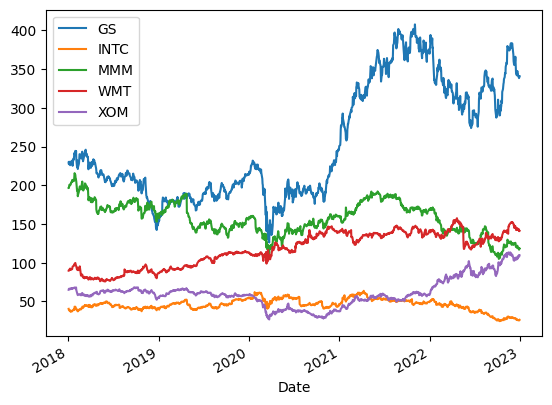

In [ ]:
#Cargar activos de Dow Jones
activos = ["GS", "INTC", "MMM", "XOM", "WMT"]
precios = yf.download(activos,start="2018-01-01",end="2022-12-31", period="1Mo")["Adj Close"]
precios.plot()

<Axes: xlabel='Date'>

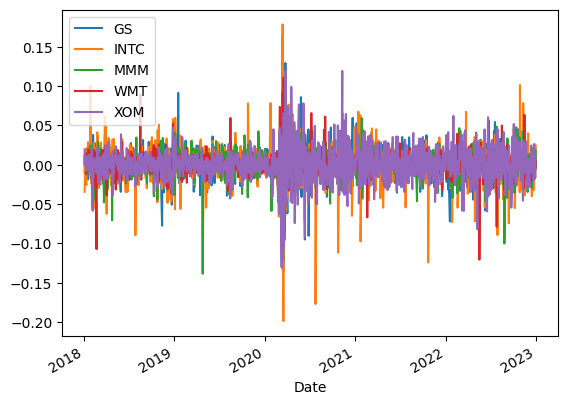

In [ ]:
retornos = np.log(precios/precios.shift()).dropna()
retornos.plot()

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

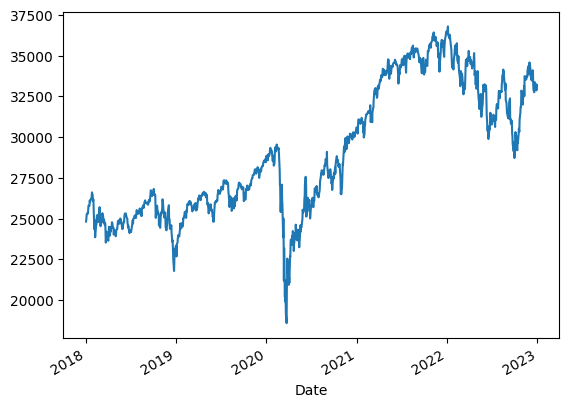

In [ ]:
# Escoger un activo y un índice de mercado
precios_indice = yf.download("^DJI", start="2018-01-01",end="2022-12-31",period="1Mo")['Adj Close']
precios_indice.plot()

<Axes: xlabel='Date'>

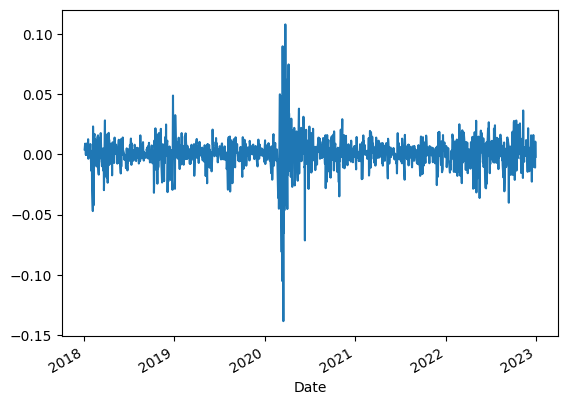

In [ ]:
retornos_indice = np.log(precios_indice/precios_indice.shift()).dropna()
retornos_indice.plot()

In [ ]:
Retornos_Promedio_Indice=retornos_indice.mean()
Sigma_Indice = retornos_indice.std()

In [ ]:
import statsmodels.api as sm
X = retornos_indice #retornos del indice
Y = retornos['GS'] #retornos del activo
X = sm.add_constant(X)
model_GS = sm.OLS(Y, X).fit() #estimacion lineal con la funcion OLS
print(model_GS.summary())

                            OLS Regression Results                            
Dep. Variable:                     GS   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     2541.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          5.45e-304
Time:                        04:52:36   Log-Likelihood:                 3781.8
No. Observations:                1258   AIC:                            -7560.
Df Residuals:                    1256   BIC:                            -7549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.126e-05      0.000      0.093      0.9

In [ ]:
Betas_GS=model_GS.params

In [ ]:
X = retornos_indice #retornos del indice
Y = retornos['INTC'] #retornos del activo
X = sm.add_constant(X)
model_INTC = sm.OLS(Y, X).fit() #estimacion lineal con la funcion OLS
print(model_INTC.summary())

                            OLS Regression Results                            
Dep. Variable:                   INTC   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     999.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          7.49e-162
Time:                        04:52:49   Log-Likelihood:                 3273.5
No. Observations:                1258   AIC:                            -6543.
Df Residuals:                    1256   BIC:                            -6533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -1.208      0.2

In [ ]:
Betas_INTC=model_INTC.params

In [ ]:
X = retornos_indice #retornos del indice
Y = retornos['MMM'] #retornos del activo
X = sm.add_constant(X)
model_MMM = sm.OLS(Y, X).fit() #estimacion lineal con la funcion OLS
print(model_MMM.summary())

In [ ]:
Betas_MMM = model_MMM.params

In [ ]:
X = retornos_indice #retornos del indice
Y = retornos['WMT'] #retornos del activo
X = sm.add_constant(X)
model_WMT = sm.OLS(Y, X).fit() #estimacion lineal con la funcion OLS
print(model_WMT.summary())

In [ ]:
Betas_WMT = model_WMT.params

In [ ]:
X = retornos_indice #retornos del indice
Y = retornos['XOM'] #retornos del activo
X = sm.add_constant(X)
model_XOM = sm.OLS(Y, X).fit() #estimacion lineal con la funcion OLS
print(model_XOM.summary())

In [ ]:
Betas_XOM = model_XOM.params

###Retornos esperados###

In [ ]:
Retornos_Promedio = retornos.mean()
Retornos_Promedio

###Volatilidades##

In [ ]:
Volatilidad = retornos.std()

###Betas y Retorno de Equilibrio##

GS

In [ ]:
Betas_GS = Betas_GS['Adj Close']

In [ ]:
#retorno de equilibrio
ret_equilibrio_GS = retornos_indice.mean()*Betas_GS #mensual
ret_equilibrio_GS
#retorno del indice promedio por la beta del activo

INTC

In [ ]:
Betas_INTC = Betas_INTC['Adj Close']

In [ ]:
#retorno de equilibrio
ret_equilibrio_INTC = retornos_indice.mean()*Betas_INTC #mensual
ret_equilibrio_INTC
#retorno del indice promedio por la beta del activo

####MMM##

In [ ]:
Betas_MMM = Betas_MMM['Adj Close']

In [ ]:
#retorno de equilibrio
ret_equilibrio_MMM = retornos_indice.mean()*Betas_MMM #mensual
ret_equilibrio_MMM
#retorno del indice promedio por la beta del activo

WMT

In [ ]:
Betas_WMT = Betas_WMT['Adj Close']

In [ ]:
#retorno de equilibrio
ret_equilibrio_WMT = retornos_indice.mean()*Betas_WMT #mensual
ret_equilibrio_WMT
#retorno del indice promedio por la beta del activo

XOM

In [ ]:
Betas_XOM = Betas_XOM['Adj Close']

In [ ]:
#retorno de equilibrio
ret_equilibrio_XOM = retornos_indice.mean()*Betas_XOM #mensual
ret_equilibrio_XOM
#retorno del indice promedio por la beta del activo

Tabla Resumen

In [ ]:
Tabla = {'Retornos Esperados': [Retornos_Promedio['GS'],Retornos_Promedio['INTC'],Retornos_Promedio['MMM'],Retornos_Promedio['WMT'],Retornos_Promedio['XOM'],Retornos_Promedio_Indice],
                   'Volatilidad':[Volatilidad['GS'],Volatilidad['INTC'],Volatilidad['MMM'],Volatilidad['WMT'],Volatilidad['XOM'],Sigma_Indice],
                   'Betas':[Betas_GS,Betas_INTC,Betas_MMM,Betas_WMT,Betas_XOM,"N.A"],
                   'Retorno Equilibrio':[ret_equilibrio_GS,ret_equilibrio_INTC,ret_equilibrio_MMM,ret_equilibrio_WMT,ret_equilibrio_XOM,"N.A"]}

Final = pd.DataFrame(Tabla,index=["Goldman Sachs","Intel","3M Company","WalMart","Exxon","Dow Jones"])
Final

Plano Riesgo Retorno

In [ ]:
Tabla_Graf = {'Betas':[Betas_GS,Betas_INTC,Betas_MMM,Betas_WMT,Betas_XOM],
                   'Retorno Equilibrio':[ret_equilibrio_GS,ret_equilibrio_INTC,ret_equilibrio_MMM,ret_equilibrio_WMT,ret_equilibrio_XOM]}

In [ ]:
sns.regplot(x=Tabla_Graf["Betas"],y=Tabla_Graf["Retorno Equilibrio"],color ='blue')
plt.show;

###Punto 2###


#b#

In [ ]:
activos = ["GS", "INTC", "MMM", "XOM", "WMT"]
precios2 = yf.download(activos,start="2018-01-01",end="2022-12-31", period="1Mo")["Adj Close"]
retornos2 = np.log(precios2/precios2.shift()).dropna()
retornos2


[*********************100%***********************]  5 of 5 completed


,GS,INTC,MMM,WMT,XOM
Date,,,,,
2018-01-03,-0.009352,-0.034527,-0.000042,0.008685,0.019450
2018-01-04,0.013879,-0.018509,0.012986,0.000904,0.001383
2018-01-05,-0.005114,0.006953,0.007762,0.005910,-0.000806
2018-01-08,-0.014626,0.000000,-0.003247,0.014673,0.004486
2018-01-09,0.008423,-0.025352,0.006194,-0.012080,-0.004255
...,...,...,...,...,...
2022-12-23,-0.000203,0.004610,-0.011997,0.002019,0.026101
2022-12-27,-0.010299,-0.005766,0.000666,0.000278,0.013798
2022-12-28,-0.003222,-0.015540,-0.016184,-0.017679,-0.016563


##Covarianzas de los activos##

In [ ]:
covarianza = retornos2.cov()
covarianza

,GS,INTC,MMM,WMT,XOM
GS,0.000434,0.000257,0.000213,0.000095,0.000261
INTC,0.000257,0.000578,0.000192,0.000122,0.000207
MMM,0.000213,0.000192,0.000296,0.000082,0.000170
WMT,0.000095,0.000122,0.000082,0.000220,0.000072
XOM,0.000261,0.000207,0.000170,0.000072,0.000455


##Promedio de los activos##

In [ ]:
promedio = retornos2.mean()
promedio

GS      0.000315
INTC   -0.000345
MMM    -0.000403
WMT     0.000362
XOM     0.000416
dtype: float64

###Desviacion estandar###

In [ ]:
dv = retornos2.std()
dv

GS      0.020825
INTC    0.024042
MMM     0.017198
WMT     0.014825
XOM     0.021333
dtype: float64

In [ ]:
n = len(activos)
unos = np.repeat(1,n)
wpmg = np.linalg.solve(covarianza,unos)/sum(np.linalg.solve(covarianza,unos))
wpmg

array([0.01644779, 0.00381061, 0.28356578, 0.55569416, 0.14048166])

In [ ]:
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x,covarianza))
restricciones = [x@promedio == 1, x>=0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/x.value.sum()
wpt

array([2.58646752e-03, 1.57863222e-18, 1.61772770e-18, 6.72412437e-01,
       3.25001095e-01])

In [ ]:
wpt.sum()
rpt = wpt @ promedio
sigmapt = np.sqrt(wpt.T@covarianza@wpt)


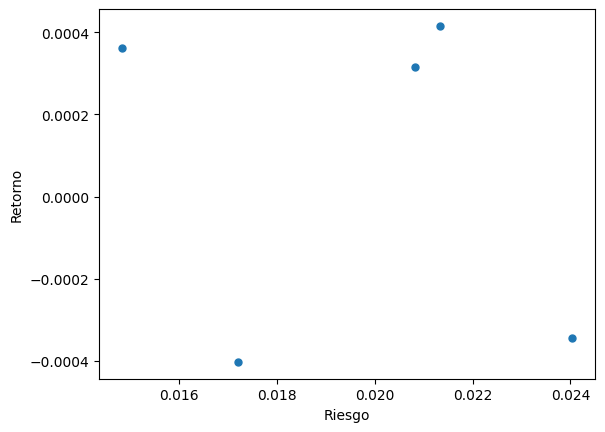

In [ ]:
plt.plot(dv,promedio,".",markersize=10)
plt.xlabel("Riesgo")
plt.ylabel("Retorno")
plt.show;

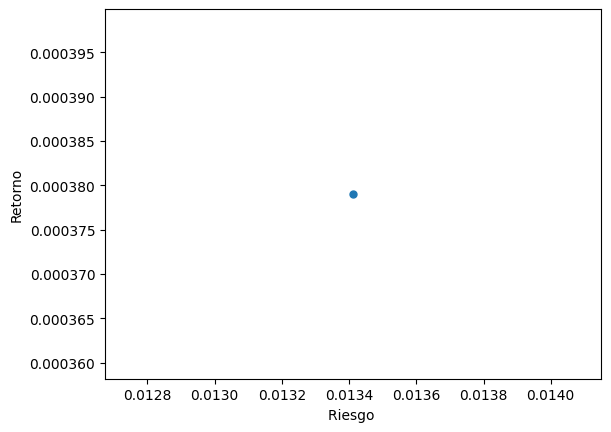

In [ ]:
plt.plot(sigmapt,rpt,".",markersize=10)
plt.xlabel("Riesgo ")
plt.ylabel("Retorno")
plt.show;

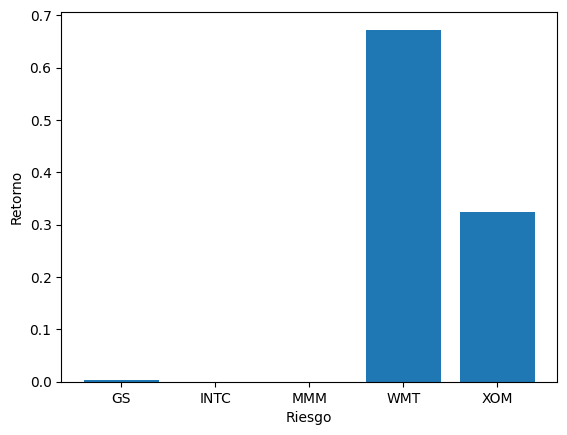

In [ ]:
plt.bar(covarianza.index,wpt)
plt.xlabel("Activos")
plt.ylabel("Peso")
plt.show;
plt.plot(sigmapt,rpt,".",markersize=1)
plt.xlabel("Riesgo")
plt.ylabel("Retorno")
plt.show;

#b#

In [ ]:
alpha = 0.05 
VaRpa = rpt - norm.ppf(1-alpha)*sigmapt
VaRpa

-0.021681585525626608

En este caso podemos evidenciar que la perdida maxima con un nivel de confianza de 95% es de -0.021681584986775568

In [ ]:
alpha = 0.01
VaRpa = rpt - norm.ppf(1-alpha)*sigmapt
VaRpa

-0.030821721162408285

En este caso podemos evidenciar que la perdida maxima con un nivel de confianza de 99% es de -0.030821720334813407

#c#

In [ ]:
VaRhist = np.percentile(retornos2,5) 
VaRhist

-0.029332138743774775

En este caso podemos evidenciar que la perdida maxima con un nivel de confianza de 95% es de -0.029331844117713186

In [ ]:
VaRhist = np.percentile(retornos2,1) 
VaRhist

-0.05526930639415629

En este caso podemos evidenciar que la perdida maxima con un nivel de confianza de 99% es de -0.05526930639415629

#d#

In [ ]:
d2 = np.random.normal(rpt,sigmapt,10000) 
p2 = np.percentile(d2,5)
p2

-0.022257361316050304

El VaR de simulacion con un nivel de significancia del 95% es de -0.022257361316050304

In [ ]:
d2 = np.random.normal(rpt,sigmapt,10000) 
p2 = np.percentile(d2,1)
p2

-0.03114242744034651

El VaR de simulacion con un nivel de significancia del 95% es de -0.022257361316050304

#e#

Con una muestra de 10.000 y despues de sacar los valores tanto del VaR de simulacion como el VaR historico, nos damos cuenta de que no son diferencias muy amplias las que se tienen, por ende este metodo funciona de una manera adecuada.

###Punto 3###

In [ ]:
#Cargar activos de Dow Jones
precios3 = yf.download("RTX",start="2015-01-01",end="2022-12-31", period="1Mo")["Adj Close"]
retornos3 = np.log(precios3/precios3.shift()).dropna()
retornos3


[*********************100%***********************]  1 of 1 completed


Date
2015-01-05   -0.016831
2015-01-06   -0.014245
2015-01-07    0.010791
2015-01-08    0.016889
2015-01-09   -0.005510
                ...   
2022-12-23    0.007988
2022-12-27    0.003619
2022-12-28   -0.005231
2022-12-29    0.011932
2022-12-30    0.005863
Name: Adj Close, Length: 2013, dtype: float64

Text(0.5, 0, 'Tiempo')

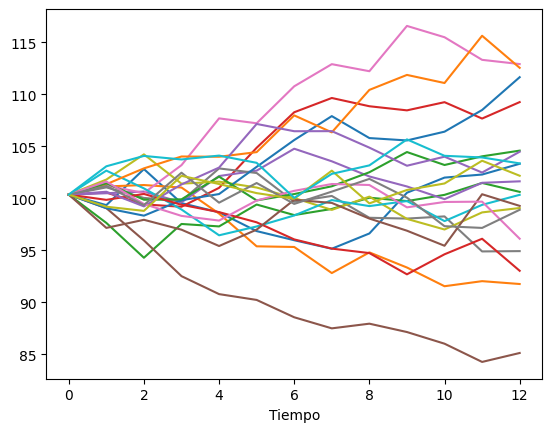

In [ ]:
mu=retornos3.mean()*12
sigma=retornos3.std()*np.sqrt(12)
def PathsGBM(S0,mu,sigma,T,NS,M):     
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S
T=1 
S0 =precios3[-1]
NS = 10000 
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.plot(np.transpose(St[0:20,:])) 
plt.xlabel("Tiempo")

#b#

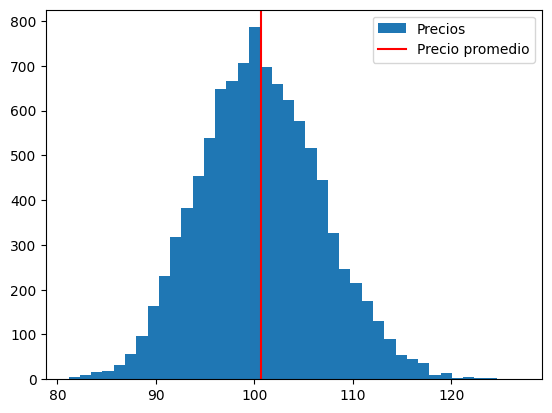

In [ ]:
plt.hist(St[:,-1], bins=40, label='Precios')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

A partir de este gráfico, podemos concluir que la distribución de los precios no es simétrica y está sesgada hacia la izquierda. Teniendo una poca mayor distribucion hacia el lado izquierdo.

#c#

In [ ]:
R3 = S0*np.exp(promedio*T)
R3

GS      100.399381
INTC    100.333150
MMM     100.327331
WMT     100.404053
XOM     100.409495
dtype: float64

In [ ]:
R3 =St[:,-1].mean()
R3

100.66665781707573

#d#

In [ ]:
d3=St[:,-1]
d3

array([103.33540562,  91.77175945, 100.63195211, ...,  96.2700145 ,
        92.63092599,  97.84538646])

In [ ]:
len(d3[d3<S0])/NS

0.4962

La probabilidad de que la accion sea inferior a So es de 0.4962

##Punto 4##

In [ ]:
t0 = 1
T = 5 
NS=100 
m=60
dt = T/m
k = 1 
mu = 3
volatilidad_4 = 0.3
steps=60
x0=1


t = np.linspace(t0,T,steps)

x = np.zeros((NS,steps))
x[:,0]=t0
volatilidad_bis_4 = volatilidad_4 * np.sqrt(2/k)
sqrt_dt = np.sqrt(dt)
for i in range(steps - 1):
  for w in range(NS-1):
    x[w,i + 1] = x[w,i] + dt * (-(x[w,i] - mu) / k) + \
        volatilidad_bis_4 * sqrt_dt * np.random.randn()
x=pd.DataFrame(x)

x

Grafico de las primeras 10 trayectorias

In [ ]:
plt.plot(np.transpose(x[0:10]));

In [ ]:
x[30].mean()

In [ ]:
x[30].mean()**2

Vemos que el valor esperado es de 2.8, mientras que la varianza es de 7.84 por lo que concluimos que se tiene una varianza bastante alta a comparacion de el valor esperado

In [ ]:
# Histograma
plt.hist(x[30], bins=40, label='Valores', color="red")
plt.axvline(x[30].mean(), color='purple', label='Promedio')
plt.legend();

Segun vemos en el histograma la serie de datos se distribuye de manera normal

In [ ]:
t0 = 0.03
T = 1
NS=100
m=12
dt = T/m
k = 1
mu = 0.05
volatilidad_4_d = 0.15
steps=12
x0=0.03

t = np.linspace(t0,T,steps) # time axis

x = np.zeros((NS,steps))
x[:,0]=t0

volatilidad_bis_4_d = volatilidad_4_d * np.sqrt(2/k)
sqrt_dt = np.sqrt(dt)
for i in range(steps - 1):
  for w in range(NS-1):
    x[w,i + 1] = x[w,i] + dt * (-(x[w,i] - mu) / k) + \
        volatilidad_bis_4_d * sqrt_dt * np.random.randn()
x=pd.DataFrame(x)
x

In [ ]:
plt.plot(np.transpose(x[0:10]));

##Punto 5##

#a#

In [ ]:
activos5=['GC=F','^IRX','HG=F']
precios5 = yf.download(activos5,start="2005-01-01",end="2022-12-31",interval="1Mo")["Adj Close"].dropna()
retornos5= np.log(precios5/precios5.shift()).dropna()
retornos5

[*********************100%***********************]  3 of 3 completed


,GC=F,HG=F,^IRX
Date,,,
2005-02-01,0.034257,0.024976,0.104948
2005-03-01,-0.018031,0.005982,0.011826
2005-04-01,0.014589,-0.007316,0.041380
2005-06-01,0.002067,0.036380,0.075668
2005-07-01,-0.013860,0.082738,0.085158
...,...,...,...
2022-08-01,-0.028831,-0.018445,0.218782
2022-09-01,-0.029867,-0.021982,0.106060
2022-10-01,-0.016069,-0.008314,0.223144


#a#

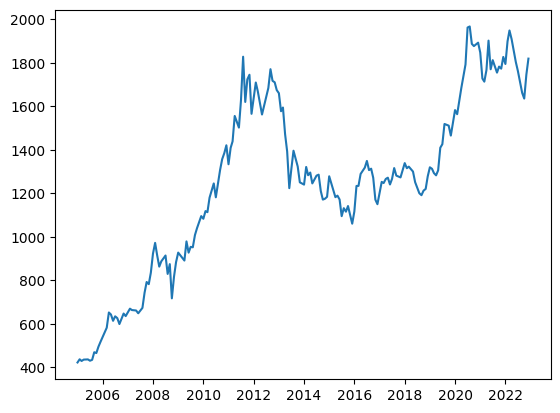

In [ ]:
plt.plot(precios5['GC=F']);


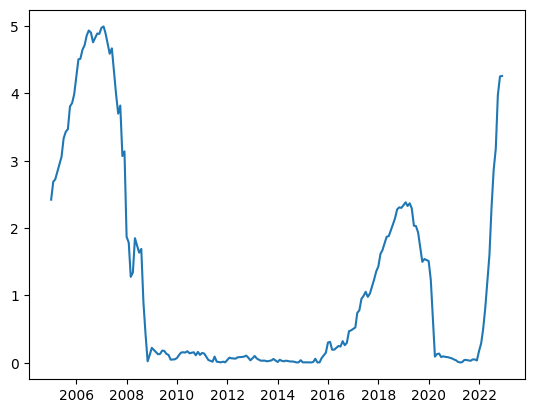

In [ ]:
plt.plot(precios5['^IRX']);

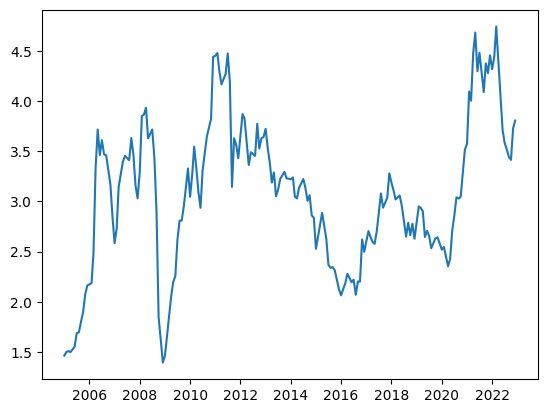

In [ ]:
plt.plot(precios5['HG=F']);

#b#

In [ ]:
pruebadf5 = adfuller(precios5['GC=F'])  
print("ADF test: %f" % pruebadf5[0])
print("P-value: %f" % pruebadf5[1])
print("Citical values:")
for key, value in pruebadf5[4].items():
  print("\t%s: %f" %(key,value)) 

ADF test: -1.606097
P-value: 0.480530
Citical values:
	1%: -3.466398
	5%: -2.877380
	10%: -2.575214


In [ ]:
pruebadf5 = adfuller(precios5['^IRX'])  
print("ADF test: %f" % pruebadf5[0])
print("P-value: %f" % pruebadf5[1])
print("Citical values:")
for key, value in pruebadf5[4].items():
  print("\t%s: %f" %(key,value)) 

ADF test: -2.762966
P-value: 0.063762
Citical values:
	1%: -3.467845
	5%: -2.878012
	10%: -2.575551


In [ ]:
pruebadf5 = adfuller(precios5['HG=F'])  
print("ADF test: %f" % pruebadf5[0])
print("P-value: %f" % pruebadf5[1])
print("Citical values:")
for key, value in pruebadf5[4].items():
  print("\t%s: %f" %(key,value)) 

ADF test: -3.058196
P-value: 0.029806
Citical values:
	1%: -3.466598
	5%: -2.877467
	10%: -2.575260


#c#

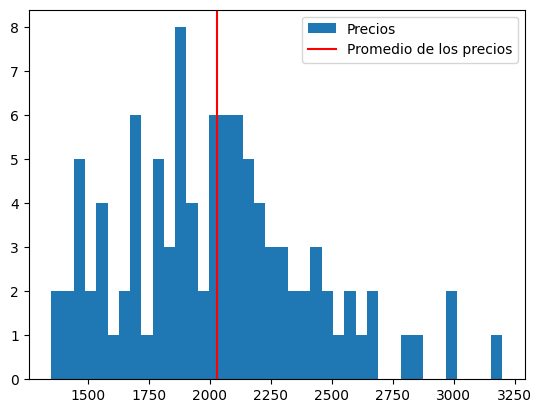

In [ ]:
mu=retornos5['GC=F'].mean()*12
sigma=retornos5['GC=F'].std()*np.sqrt(12)
T=1 
activo=precios5['GC=F']
S0 =activo[-1]
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.hist(St[:,-1], bins=40, label='Precios')
plt.axvline(St[:,-1].mean(), color='r', label='Promedio de los precios')
plt.legend();
d=St[:,-1]


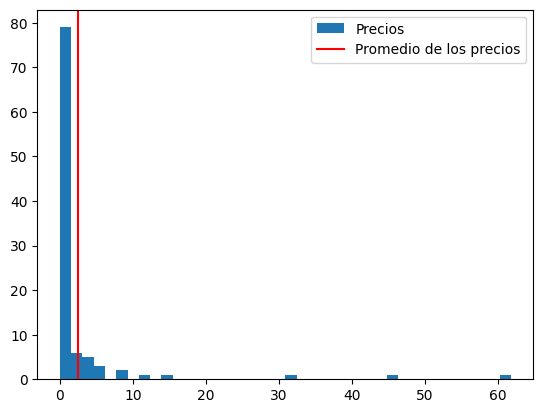

In [ ]:
mu=retornos5['^IRX'].mean()*12
sigma=retornos5['^IRX'].std()*np.sqrt(12)
T=1 
activo=precios5['^IRX']
S0 =activo[-1]
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.hist(St[:,-1], bins=40, label='Precios')
plt.axvline(St[:,-1].mean(), color='r', label='Promedio de los precios')
plt.legend();
d=St[:,-1]

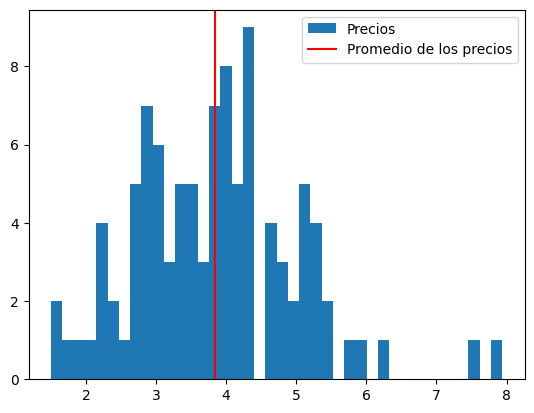

In [ ]:
mu=retornos5['HG=F'].mean()*12
sigma=retornos5['HG=F'].std()*np.sqrt(12)
T=1 
activo=precios5['HG=F']
S0 =activo[-1]
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.hist(St[:,-1], bins=40, label='Precios')
plt.axvline(St[:,-1].mean(), color='r', label='Promedio de los precios')
plt.legend();
d=St[:,-1]